In [25]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [12]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)
x_train_flat = x_train_flat/255
x_test_flat = x_test_flat/255

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')
])

model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy'])

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4651 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3033 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2667 - accuracy: 0.9252


In [14]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2716 - accuracy: 0.9237


[0.27156683802604675, 0.9236999750137329]

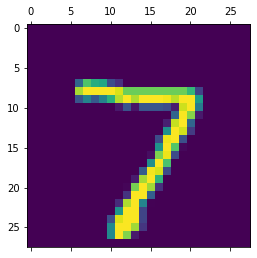

In [19]:
plt.matshow(x_test[0])

In [18]:
y_predicted = model.predict(x_test_flat)  #---> prediction layer   ----> contains prob of each number
np.argmax(y_predicted[0])


313/313 [==============================] - 2s 6ms/step


7

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

7

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,    9,  923,   20,   10,    4,   13,   11,   31,    4],
       [   2,    0,   14,  939,    0,   22,    3,   11,   10,    9],
       [   2,    1,    2,    2,  920,    0,   11,    4,    7,   33],
       [   9,    2,    3,   39,   10,  774,   21,    5,   23,    6],
       [  11,    3,    7,    1,    8,    7,  918,    2,    1,    0],
       [   2,    6,   21,    6,    7,    0,    0,  952,    1,   33],
       [  11,   10,    8,   38,   10,   42,   11,   14,  818,   12],
       [  11,    7,    1,   11,   29,    9,    0,   28,    1,  912]])>

Text(69.0, 0.5, 'Truth')

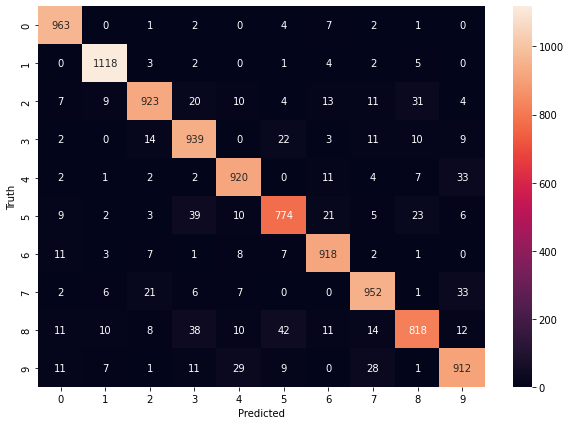

In [27]:
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding Hidden Layer

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')        ###### hidden layer
])

model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy'])

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2706 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1217 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0840 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0654 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0512 - accuracy: 0.9838


In [30]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0868 - accuracy: 0.9738


[0.08680257201194763, 0.973800003528595]

313/313 [==============================] - 2s 6ms/step


Text(69.0, 0.5, 'Truth')

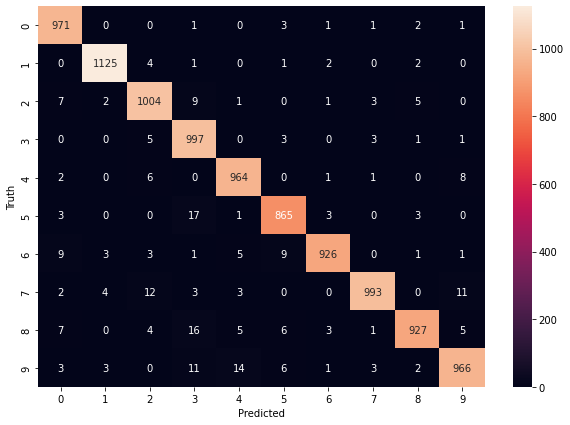

In [31]:
y_predicted = model.predict(x_test_flat)  #---> prediction layer   ----> contains prob of each number
np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')